In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.gridspec as gridspec
from scipy.stats import mode

from read_positions import *



In [9]:
sns.set_style("darkgrid")

palette = sns.color_palette("hls", 5)
sns.set_palette(palette)

In [10]:
df = read_positions(label_dir='../data_all/labels', output_csv='positions.csv')
dates_to_exclude = [pd.to_datetime('2024-01-21').date(), pd.to_datetime('2024-01-22').date(), pd.to_datetime('2024-01-23').date()]
# dates_to_exclude = [pd.to_datetime('2024-01-21')]

df = df[~df['Date'].dt.date.isin(dates_to_exclude)]
df.head(11)
df.info()
sorted(df['Date'].dt.date.unique())

<class 'pandas.core.frame.DataFrame'>
Index: 7720 entries, 0 to 8087
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Camera    7720 non-null   int64         
 1   Date      7720 non-null   datetime64[ns]
 2   X_center  7720 non-null   float64       
 3   Y_center  7720 non-null   float64       
 4   Width     7720 non-null   float64       
 5   Height    7720 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 422.2 KB


[datetime.date(2024, 1, 24),
 datetime.date(2024, 1, 25),
 datetime.date(2024, 1, 26),
 datetime.date(2024, 1, 27),
 datetime.date(2024, 1, 28),
 datetime.date(2024, 1, 29),
 datetime.date(2024, 1, 30),
 datetime.date(2024, 1, 31),
 datetime.date(2024, 2, 1),
 datetime.date(2024, 2, 2),
 datetime.date(2024, 2, 3),
 datetime.date(2024, 2, 4),
 datetime.date(2024, 2, 5),
 datetime.date(2024, 2, 6),
 datetime.date(2024, 2, 7),
 datetime.date(2024, 2, 8),
 datetime.date(2024, 2, 9),
 datetime.date(2024, 2, 10),
 datetime.date(2024, 2, 11),
 datetime.date(2024, 2, 12),
 datetime.date(2024, 2, 13),
 datetime.date(2024, 2, 14),
 datetime.date(2024, 2, 15),
 datetime.date(2024, 2, 16),
 datetime.date(2024, 2, 17),
 datetime.date(2024, 2, 18),
 datetime.date(2024, 2, 19),
 datetime.date(2024, 2, 20),
 datetime.date(2024, 2, 21),
 datetime.date(2024, 2, 22),
 datetime.date(2024, 2, 23),
 datetime.date(2024, 2, 24),
 datetime.date(2024, 2, 25),
 datetime.date(2024, 2, 26),
 datetime.date(2024, 2,

In [11]:
df.drop(columns=['X_center', 'Y_center', 'Width' , 'Height'], inplace=True)

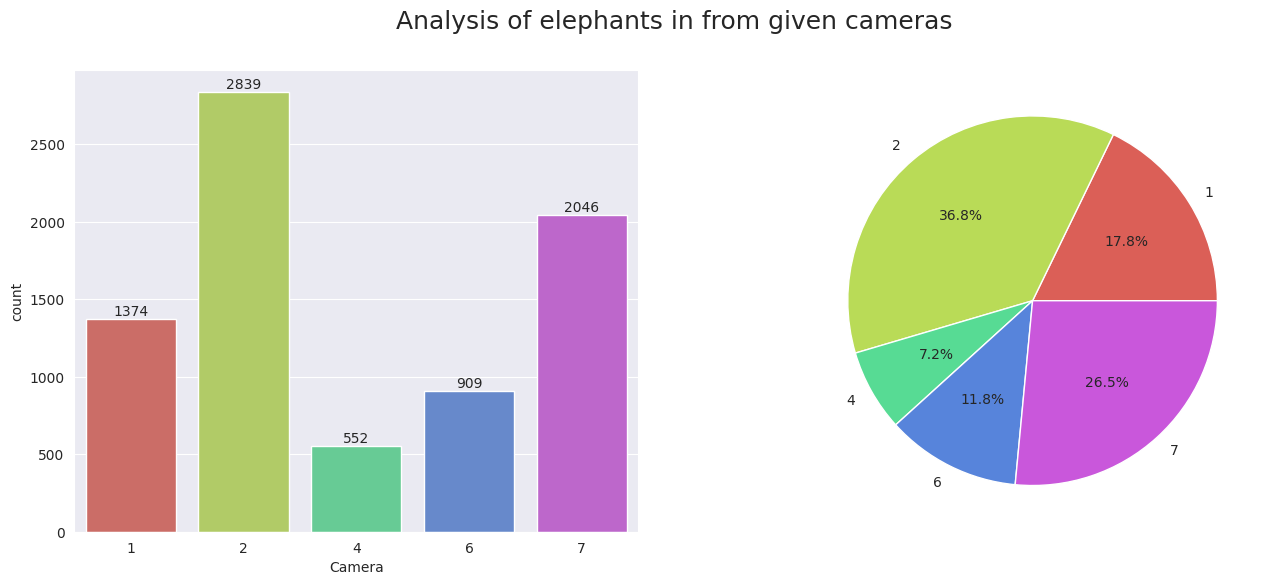

In [12]:
# Inspired from 4th notebook of BI-VIZ course
def univariate_cat_dt(df, column, title):
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True) 
    })
    stats_df.sort_index(inplace=True)
    mode = pd.DataFrame(np.array([
        ["Mode", df[column].mode()[0]], 
    ]), columns=['Name', 'Value'])    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    fig.suptitle(title, fontsize = 18)
    sns.countplot(data=df, x=column, ax=ax1, palette=palette, hue=column)
    
    # Adjusted part: Iterate over all containers
    for container in ax1.containers:
        ax1.bar_label(container)
    ax1.legend().set_visible(False)

    
    ax2.pie(stats_df['Frequency'], labels=stats_df.index, autopct='%1.1f%%')
    plt.show()
    

univariate_cat_dt(df, 'Camera', 'Analysis of elephants in from given cameras')

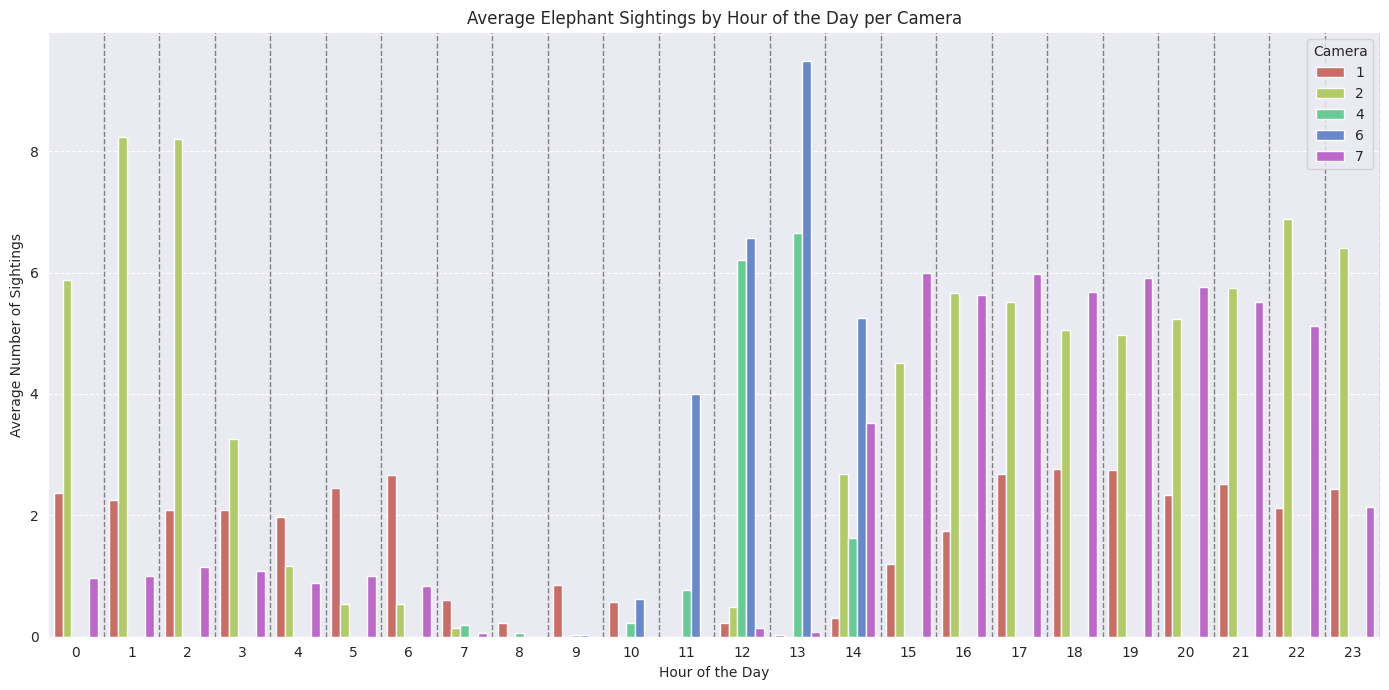

In [73]:
# Calculate the number of unique days to find the divisor for averaging
df['Hour'] = df['Date'].dt.hour
num_days = df['Date'].dt.date.nunique()
hourly_sightings = df.groupby(['Hour', 'Camera']).size().unstack(fill_value=0) / num_days

hourly_sightings_melted = hourly_sightings.reset_index().melt(id_vars='Hour', var_name='Camera', value_name='Average Sightings')

# Adjusting the graph with wider separators
plt.figure(figsize=(14, 7))
sns.barplot(x='Hour', y='Average Sightings', hue='Camera', data=hourly_sightings_melted, dodge=True, palette=sns.color_palette("hls", len(hourly_sightings.columns)))
for hour in range(0, 24):
    plt.axvline(x=hour + 0.5, color='grey', linestyle='--', linewidth=1)

plt.title('Average Elephant Sightings by Hour of the Day per Camera')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Sightings')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.legend(title='Camera', loc='upper right')

plt.tight_layout()
plt.show()


/tmp/ipykernel_2844823/3645809836.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_camera = df.groupby(['Hour', 'Weekday', 'Camera']).size().reset_index(name='Sightings')
/tmp/ipykernel_2844823/3645809836.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_avg_sightings = grouped_by_camera.loc[grouped_by_camera.groupby(['Hour', 'Weekday'])['Average Sightings Per Day'].idxmax()]


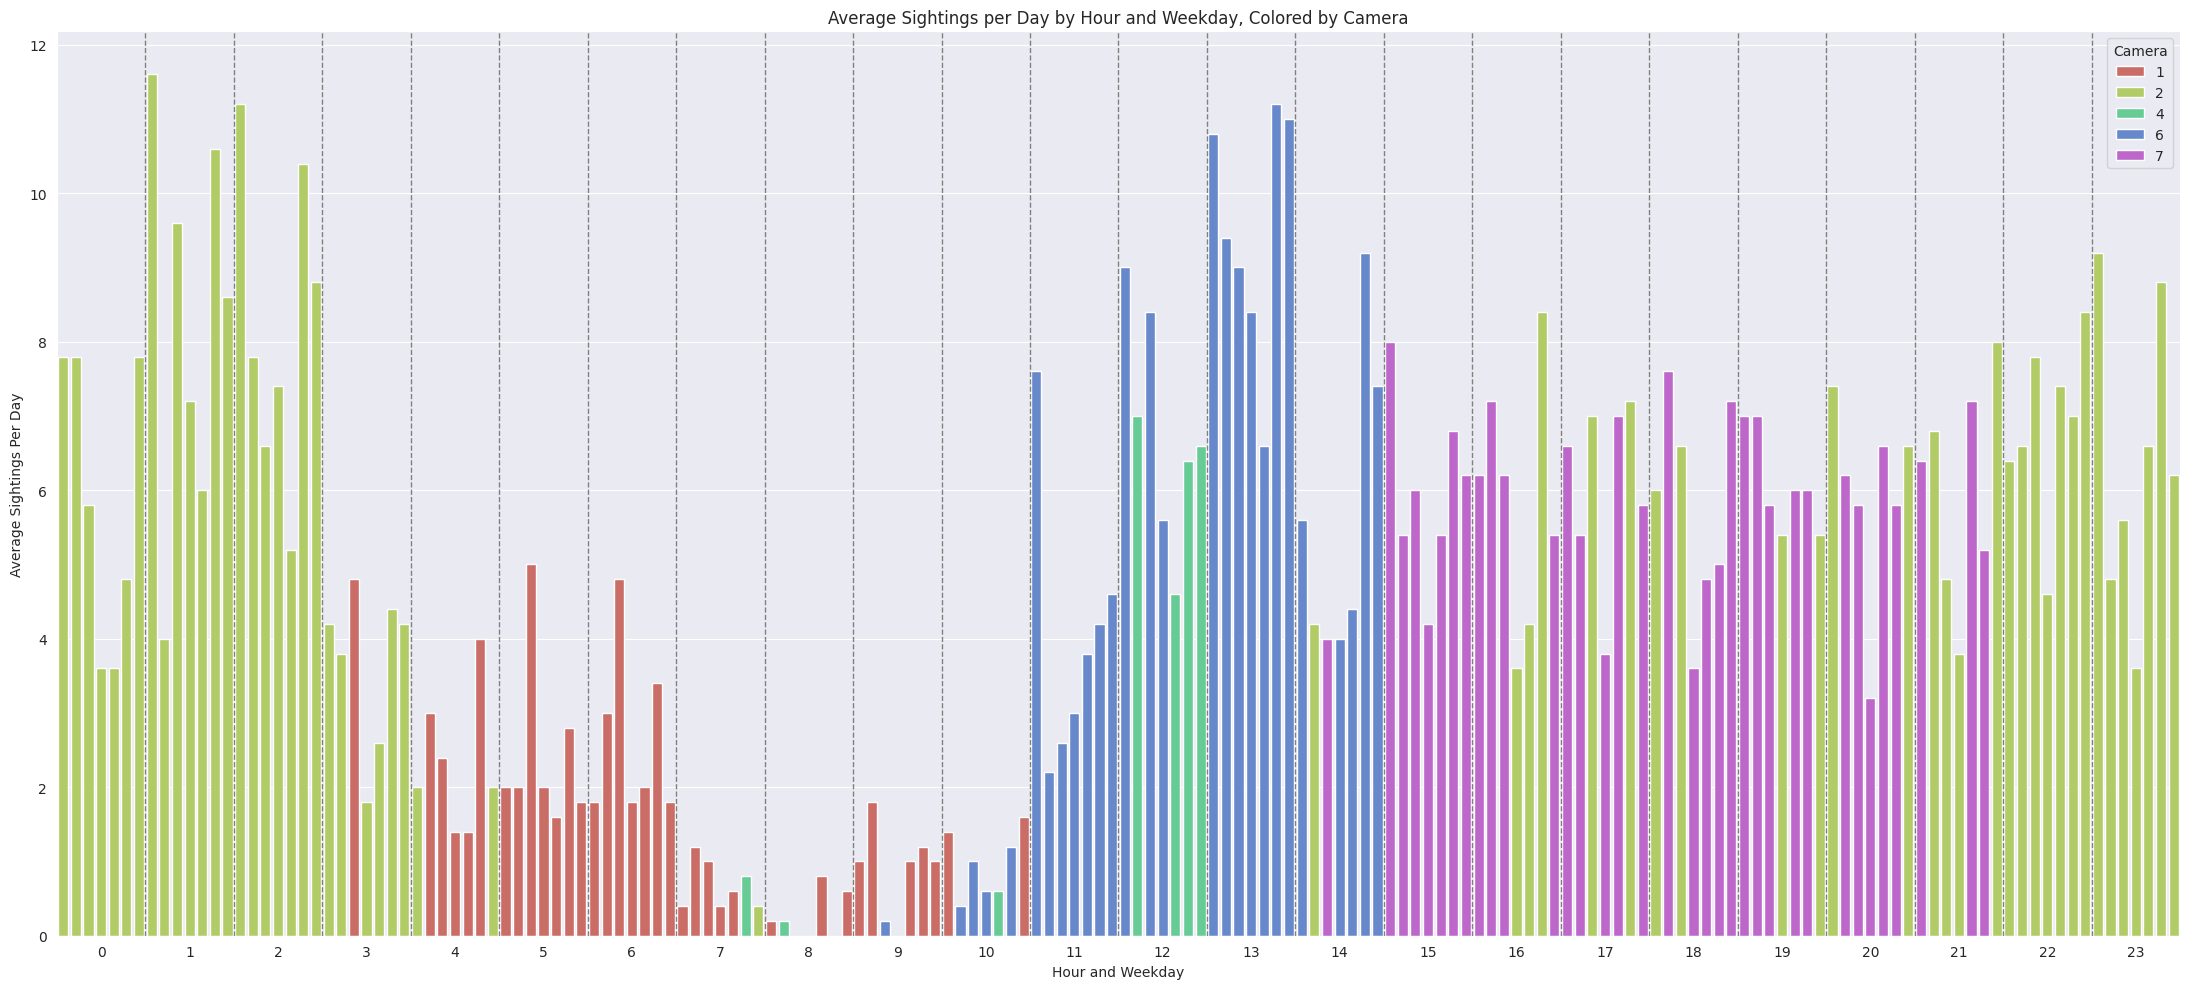

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded and prepared with 'Hour' and 'Weekday'
# If not, uncomment the following lines and adjust the file path
# file_path = 'your_file_path_here.csv'
# df = pd.read_csv(file_path)

# Preparation steps
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)



# Group the data by 'Hour', 'Weekday', and 'Camera', counting sightings
grouped_by_camera = df.groupby(['Hour', 'Weekday', 'Camera']).size().reset_index(name='Sightings')

# Calculate average sightings per day by dividing the total sightings by the number of days in the dataset
# Since the dataset spans 5 weeks, and each week has 7 days, we use this to calculate the total number of days for each weekday
weeks = 5
grouped_by_camera['Average Sightings Per Day'] = grouped_by_camera['Sightings'] / weeks

# Find the maximum average sighting for each "Hour-Weekday" combination
max_avg_sightings = grouped_by_camera.loc[grouped_by_camera.groupby(['Hour', 'Weekday'])['Average Sightings Per Day'].idxmax()]

# Create a 'Hour-Weekday' identifier for plotting
max_avg_sightings['Hour-Weekday'] = max_avg_sightings['Hour'].astype(str) + '-' + max_avg_sightings['Weekday'].astype(str)

# Plotting
plt.figure(figsize=(22, 10))
sns.barplot(x='Hour-Weekday', y='Average Sightings Per Day', hue='Camera', data=max_avg_sightings, dodge=False, palette=sns.color_palette("hls", df['Camera'].nunique()))

unique_hours = sorted(max_avg_sightings['Hour'].unique())
# Determine positions for the unique hour labels, aiming to place them centrally for each group of weekdays
label_positions = [(unique_hours.index(hour) * 7 + 3) for hour in unique_hours]  # Assuming 7 weekdays per hour group, +3 centers the label

plt.xticks(ticks=label_positions, labels=unique_hours, rotation=90)

for pos in label_positions[:-1]:  # Skip the last position to avoid drawing a line at the edge
    plt.axvline(x=pos + 3.5, color='grey', linestyle='--', linewidth=1)  # +3.5 to reach halfway between groups

plt.title('Average Sightings per Day by Hour and Weekday, Colored by Camera')
plt.xlabel('Hour and Weekday')
plt.ylabel('Average Sightings Per Day')
plt.xticks(rotation=0)

plt.legend(title='Camera', loc='upper right')
plt.tight_layout()
plt.show()


/tmp/ipykernel_2844823/3389176086.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_camera_day_type = df.groupby(['Hour', 'Day Type', 'Camera']).size().reset_index(name='Sightings')
/tmp/ipykernel_2844823/3389176086.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_avg_sightings_day_type = grouped_by_camera_day_type.loc[grouped_by_camera_day_type.groupby(['Hour', 'Day Type'])['Average Sightings Per Day'].idxmax()]


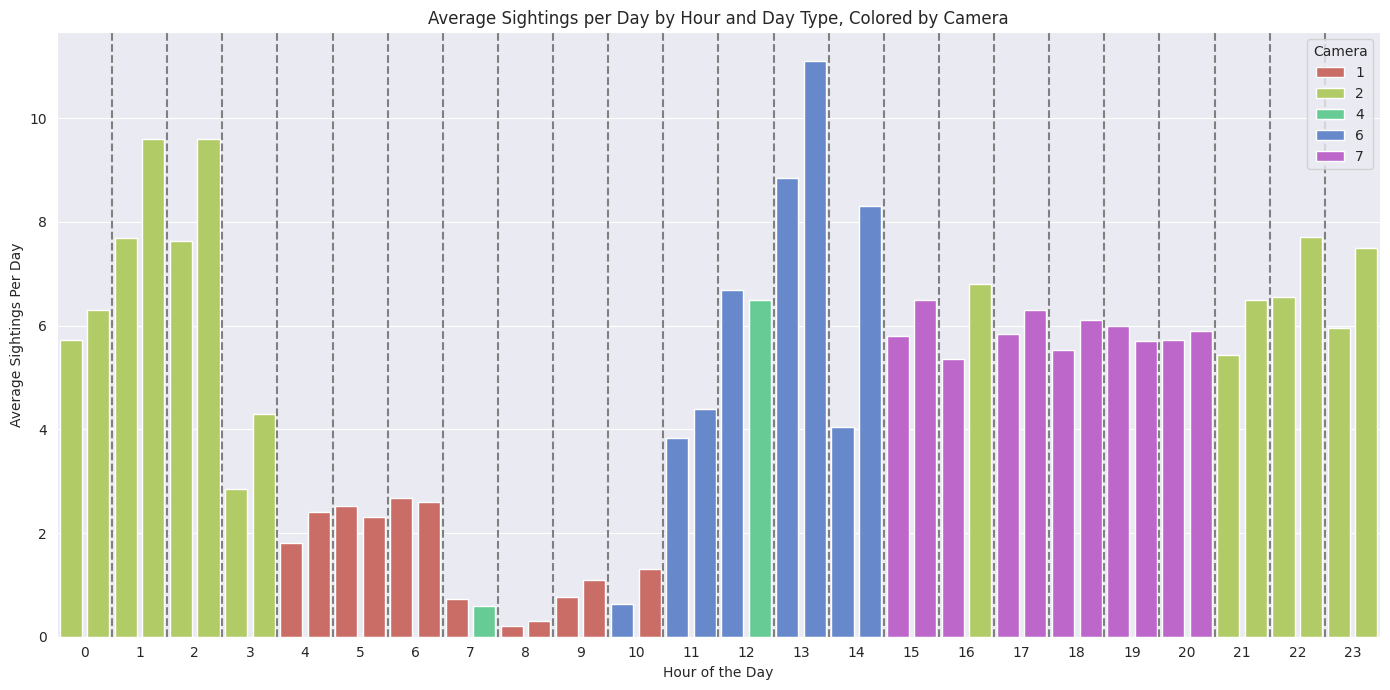

In [16]:
import pandas as pd
import numpy as np
import seaborn as snsa
import matplotlib.pyplot as plt

# Assuming df is already loaded and prepared with 'Hour' and 'Weekday'
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.dayofweek
df['Day Type'] = df['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Workday')

# Convert 'Day Type' into a categorical type with a defined order
df['Day Type'] = pd.Categorical(df['Day Type'], categories=['Workday', 'Weekend'], ordered=True)

# Group the data by 'Hour', 'Day Type', and 'Camera', counting sightings
grouped_by_camera_day_type = df.groupby(['Hour', 'Day Type', 'Camera']).size().reset_index(name='Sightings')

# Fix: Ensure 'Days' column calculation does not involve any categorical type inadvertently
# Calculate days based on 'Day Type' string value rather than the categorical type to avoid the division error
grouped_by_camera_day_type['Days'] = grouped_by_camera_day_type['Day Type'].map({'Workday': 25, 'Weekend': 10}).astype(float)
grouped_by_camera_day_type['Average Sightings Per Day'] = grouped_by_camera_day_type['Sightings'] / grouped_by_camera_day_type['Days']

# Finding the maximum average sighting for each "Hour-Day Type" combination
max_avg_sightings_day_type = grouped_by_camera_day_type.loc[grouped_by_camera_day_type.groupby(['Hour', 'Day Type'])['Average Sightings Per Day'].idxmax()]

# Create a 'Hour-Day Type' identifier for plotting, directly using 'Day Type' string values
max_avg_sightings_day_type['Hour-Day Type'] = max_avg_sightings_day_type['Hour'].astype(str) + '-' + max_avg_sightings_day_type['Day Type'].astype(str)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='Hour-Day Type', y='Average Sightings Per Day', hue='Camera', data=max_avg_sightings_day_type, dodge=False, palette=sns.color_palette("hls", df['Camera'].nunique()))


unique_hours = sorted(max_avg_sightings_day_type['Hour'].unique())
label_positions = [(unique_hours.index(hour) * 2 + 0.5) for hour in unique_hours]  # Assuming 7 weekdays per hour group, +3 centers the label
plt.xticks(ticks=label_positions, labels=unique_hours, rotation=0)
for pos in label_positions[:-1]:  
    plt.axvline(x=pos + 1, color='grey', linestyle='--', linewidth=1.5) 
plt.xticks(rotation=0)

plt.title('Average Sightings per Day by Hour and Day Type, Colored by Camera')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Sightings Per Day')

plt.legend(title='Camera', loc='upper right')
plt.tight_layout()
plt.show()


WEEKEND

In [ ]:
XSAKJKDL

In [136]:
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder

# # Assuming 'max_avg_sightings_day_type' is your DataFrame prepared in previous steps

# # Encode 'Day Type' as numerical values
# le = LabelEncoder()
# max_avg_sightings_day_type['Day Type Encoded'] = le.fit_transform(max_avg_sightings_day_type['Day Type'])

# # Features and target variable
# X = max_avg_sightings_day_type[['Hour', 'Day Type Encoded']]  # Features
# y = max_avg_sightings_day_type['Camera']  # Target variable

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the decision tree classifier
# clf = DecisionTreeClassifier(random_state=42)
# clf.fit(X_train, y_train)

# # Predict on the test set
# y_pred = clf.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model accuracy: {accuracy:.2f}")

# # Optional: Export the decision tree for visualization
# from sklearn.tree import export_graphviz
# class_names = y.unique().astype(str)  # Ensure class names are in string format for export_graphviz

# export_graphviz(clf, out_file='tree.dot', 
#                 feature_names=['Hour', 'Day Type Encoded'],
#                 class_names=class_names,  # Updated to use the correct class names
#                 rounded=True, proportion=False, 
#                 precision=2, filled=True)

# # You can convert 'tree.dot' to a PNG file using graphviz from the command line:
# # dot -Tpng tree.dot -o tree.png
# from sklearn.tree import plot_tree

# plt.figure(figsize=(20, 10))
# plot_tree(clf, feature_names=['Hour', 'Day Type Encoded'], class_names=class_names, filled=True, rounded=True)

# plt.show()


In [ ]:
def get_random_mode(series):
    # Calculate mode
    m = mode(series)
    # If the mode result is an array and has more than one mode, select one randomly
    if isinstance(m.mode, np.ndarray) and len(m.mode) > 1:
        return np.random.choice(m.mode)
    else:
        # If it's a scalar or an array with only one mode, return it directly
        return m.mode

# Use this function when grouping to find the most frequent camera for each 'ExactTime'
grouped = df.groupby('Date')['Camera'].agg(lambda x: get_random_mode(x)).reset_index()
# Convert 'Date' to additional features
grouped['DayOfWeek'] = grouped['Date'].dt.dayofweek
grouped['IsWeekend'] = (grouped['DayOfWeek'] >= 5).astype(int)

# Convert time to decimal hours
grouped['DecimalTime'] = grouped['Date'].dt.hour + grouped['Date'].dt.minute / 60.0

# Splitting the data
X = grouped[['DecimalTime', 'DayOfWeek', 'IsWeekend']]
y = grouped['Camera']


Best Settings:
Depth: 5, Criterion: entropy, Best Validation Accuracy: 0.6071
Test Set Accuracy: 0.6474


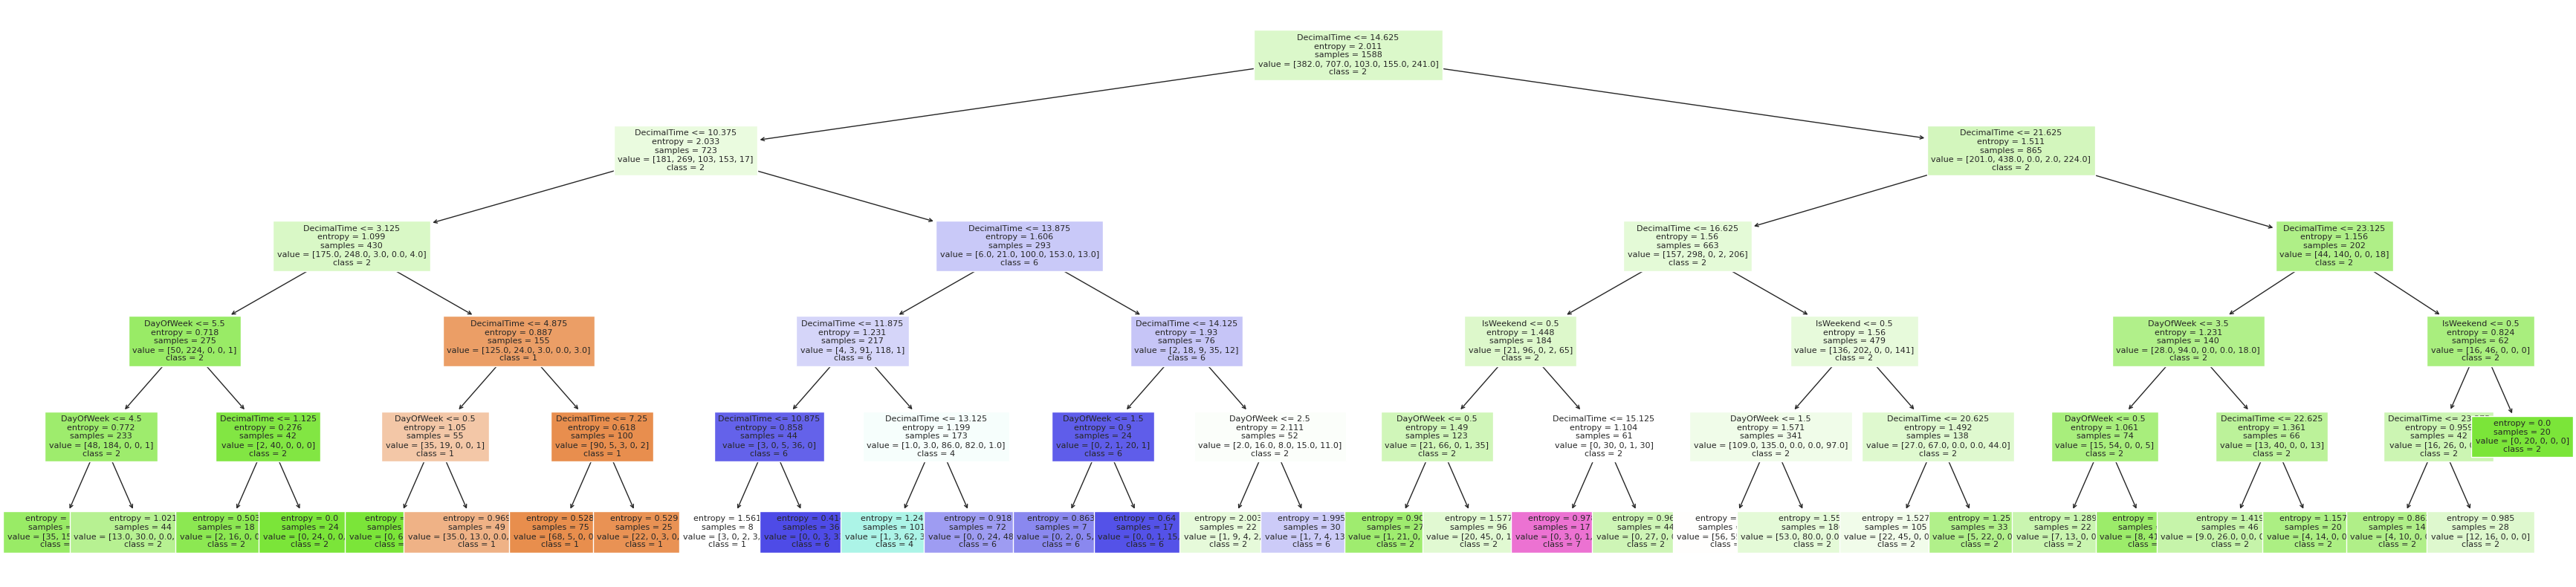

In [161]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=36)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=49)
# Initialize variables to track the best performance
best_depth = None
best_accuracy = 0
best_criterion = None

depths = range(1, 10)
criteria = ['gini', 'entropy']

for depth in depths:
    for criterion in criteria:
        clf = DecisionTreeClassifier(random_state=42, max_depth=depth, criterion=criterion)
        clf.fit(X_train, y_train)
        y_pred_val = clf.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred_val)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth
            best_criterion = criterion

print(f"\nBest Settings:\nDepth: {best_depth}, Criterion: {best_criterion}, Best Validation Accuracy: {best_accuracy:.4f}")

# Train a new model on the combined training and validation set with the best parameters
clf_best = DecisionTreeClassifier(random_state=42, max_depth=best_depth, criterion=best_criterion)
clf_best.fit(X_temp, y_temp)  # Retraining on the combined training + validation set

# Evaluate the best model on the test set
y_pred_test = clf_best.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Set Accuracy: {accuracy_test:.4f}")

from sklearn.tree import plot_tree

plt.figure(figsize=(35, 8))
plot_tree(clf_best, feature_names=['DecimalTime', 'DayOfWeek', 'IsWeekend'], class_names=class_names, filled=True, fontsize=8)
plt.tight_layout()
plt.show()

Depth: 1, Criterion: gini, Validation Accuracy: 0.4509
Depth: 1, Criterion: entropy, Validation Accuracy: 0.4509
Depth: 2, Criterion: gini, Validation Accuracy: 0.5164
Depth: 2, Criterion: entropy, Validation Accuracy: 0.5264
Depth: 3, Criterion: gini, Validation Accuracy: 0.5844
Depth: 3, Criterion: entropy, Validation Accuracy: 0.5793
Depth: 4, Criterion: gini, Validation Accuracy: 0.5844
Depth: 4, Criterion: entropy, Validation Accuracy: 0.5642
Depth: 5, Criterion: gini, Validation Accuracy: 0.5793
Depth: 5, Criterion: entropy, Validation Accuracy: 0.6071
Depth: 6, Criterion: gini, Validation Accuracy: 0.5970
Depth: 6, Criterion: entropy, Validation Accuracy: 0.5894
Depth: 7, Criterion: gini, Validation Accuracy: 0.5642
Depth: 7, Criterion: entropy, Validation Accuracy: 0.5844
Depth: 8, Criterion: gini, Validation Accuracy: 0.5416
Depth: 8, Criterion: entropy, Validation Accuracy: 0.5718
Depth: 9, Criterion: gini, Validation Accuracy: 0.5340
Depth: 9, Criterion: entropy, Validation 

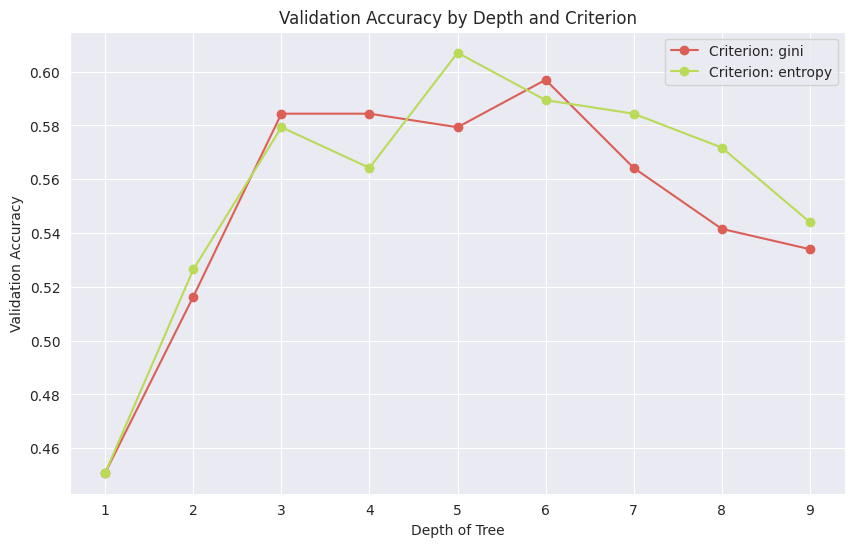

In [156]:
import matplotlib.pyplot as plt

# Initialize a list to store validation accuracies along with corresponding depth and criterion
val_accuracies = []

# Continue with your existing loop for training and evaluation
for depth in depths:
    for criterion in criteria:
        clf = DecisionTreeClassifier(random_state=42, max_depth=depth, criterion=criterion)
        clf.fit(X_train, y_train)
        y_pred_val = clf.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred_val)
        
        # Store depth, criterion, and validation accuracy
        val_accuracies.append((depth, criterion, accuracy))
        
        print(f"Depth: {depth}, Criterion: {criterion}, Validation Accuracy: {accuracy:.4f}")
        
        # Update the best performing model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth
            best_criterion = criterion

# After finding the best settings
print(f"\nBest Settings:\nDepth: {best_depth}, Criterion: {best_criterion}, Best Validation Accuracy: {best_accuracy:.4f}")

# Plotting the validation accuracies
plt.figure(figsize=(10, 6))

# Separate accuracies by criterion for plotting
for criterion in criteria:
    depths_for_criterion = [entry[0] for entry in val_accuracies if entry[1] == criterion]
    accuracies_for_criterion = [entry[2] for entry in val_accuracies if entry[1] == criterion]
    plt.plot(depths_for_criterion, accuracies_for_criterion, label=f'Criterion: {criterion}', marker='o')

plt.xlabel('Depth of Tree')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy by Depth and Criterion')
plt.legend()
plt.grid(True)
plt.show()
